Word removal-experiment with word removals both in high frequency and low frequency space

Taxonomy- Ordered heirarchial taxonomy can help you reduce entropy in content. Similar to what decision trees accomplish. This is SUPER unappreciated in most text analytics literature

Lemmatization. _ it sometimes helps improve structure of text

Data Quality check- Good data is like good food. Have you checked if you have any useless data? pruning data set helps improve structure a lot!

Hyper Parameter tuning- Did you exhaustively search the subspaces to fine tune the model. Most models show upto 10% improvement by just hyperparameter tuning.

Word Gram conversion- you can improve feature set by converting important bigrams and trigrams into unigrams "food processing" can be changed to "food_processing"

Data preparation- Count vectors, tf-idf, word2vec .. et al.. Naive bayes seems to work better Count vectors,

**Shuffle with stratification for model fitting***

Colab google drive

In [4]:
import pandas as pd

In [5]:
train = pd.read_csv("train.csv")
train.head()

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0


In [6]:
test = pd.read_csv("test.csv")
test.head()

,qid,question_text
0,00014894849d00ba98a9,My voice range is A2-C5. My chest voice goes u...
1,000156468431f09b3cae,How much does a tutor earn in Bangalore?
2,000227734433360e1aae,What are the best made pocket knives under $20...
3,0005e06fbe3045bd2a92,Why would they add a hypothetical scenario tha...
4,00068a0f7f41f50fc399,What is the dresscode for Techmahindra freshers?


***Lets Start Removing Redundancies***

In [7]:
mispell_dict = {"aren't" : "are not",
"can't" : "cannot",
"couldn't" : "could not",
"didn't" : "did not",
"doesn't" : "does not",
"don't" : "do not",
"hadn't" : "had not",
"hasn't" : "has not",
"haven't" : "have not",
"he'd" : "he would",
"he'll" : "he will",
"he's" : "he is",
"i'd" : "I would",
"i'd" : "I had",
"i'll" : "I will",
"i'm" : "I am",
"isn't" : "is not",
"it's" : "it is",
"it'll":"it will",
"i've" : "I have",
"let's" : "let us",
"mightn't" : "might not",
"mustn't" : "must not",
"shan't" : "shall not",
"she'd" : "she would",
"she'll" : "she will",
"she's" : "she is",
"shouldn't" : "should not",
"that's" : "that is",
"there's" : "there is",
"they'd" : "they would",
"they'll" : "they will",
"they're" : "they are",
"they've" : "they have",
"we'd" : "we would",
"we're" : "we are",
"weren't" : "were not",
"we've" : "we have",
"what'll" : "what will",
"what're" : "what are",
"what's" : "what is",
"what've" : "what have",
"where's" : "where is",
"who'd" : "who would",
"who'll" : "who will",
"who're" : "who are",
"who's" : "who is",
"who've" : "who have",
"won't" : "will not",
"wouldn't" : "would not",
"you'd" : "you would",
"you'll" : "you will",
"you're" : "you are",
"you've" : "you have",
"'re": " are",
"wasn't": "was not",
"we'll":" will",
"didn't": "did not",
"tryin'":"trying"}

In [8]:
def clean_str(df):
    df['question_text'] = df['question_text'].str.lower()
    df['question_text'] = df['question_text'].map(lambda x: (' ').join([mispell_dict[w] if w in mispell_dict else w for w in x.split(" ")]))
    return df

In [9]:
train = clean_str(train)
test = clean_str(test)

In [10]:
count_nan = len(train) - train.count()
count_nan

qid              0
question_text    0
target           0
dtype: int64

In [11]:
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)


In [12]:
train['question_text'] =train['question_text'].apply(remove_punctuation)
train.head()

,qid,question_text,target
0,00002165364db923c7e6,how did quebec nationalists see their province...,0
1,000032939017120e6e44,do you have an adopted dog how would you encou...,0
2,0000412ca6e4628ce2cf,why does velocity affect time does velocity af...,0
3,000042bf85aa498cd78e,how did otto von guericke used the magdeburg h...,0
4,0000455dfa3e01eae3af,can i convert montra helicon d to a mountain b...,0


In [13]:
from nltk.corpus import stopwords

In [14]:
sw = stopwords.words('english')

In [15]:
def stopwords(text):
    '''a function for removing the stopword'''
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    return " ".join(text)

In [16]:
train['question_text'] = train['question_text'].apply(stopwords)
train.head(10)

,qid,question_text,target
0,00002165364db923c7e6,quebec nationalists see province nation 1960s,0
1,000032939017120e6e44,adopted dog would encourage people adopt shop,0
2,0000412ca6e4628ce2cf,velocity affect time velocity affect space geo...,0
3,000042bf85aa498cd78e,otto von guericke used magdeburg hemispheres,0
4,0000455dfa3e01eae3af,convert montra helicon mountain bike changing ...,0
5,00004f9a462a357c33be,gaza slowly becoming auschwitz dachau treblink...,0
6,00005059a06ee19e11ad,quora automatically ban conservative opinions ...,0
7,0000559f875832745e2e,crazy wash wipe groceries germs everywhere,0
8,00005bd3426b2d0c8305,thing dressing moderately different dressing m...,0
9,00006e6928c5df60eacb,ever phase wherein became ignorant people love...,0


***EXPLORATION TIME***

In [21]:
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS
import matplotlib as mpl
import matplotlib.pyplot as plt

In [22]:
neg = train[train['target']==1]
pos = train[train['target']==0]

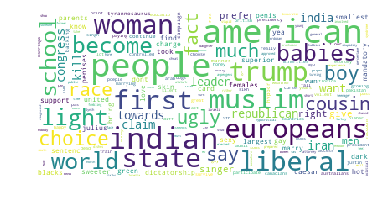

In [16]:
mpl.rcParams['font.size']=12                #10 
mpl.rcParams['savefig.dpi']=100             #72 
mpl.rcParams['figure.subplot.bottom']=.1 


stopwords = set(STOPWORDS)


wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(neg['question_text']))

print(wordcloud)
fig = plt.figure(0)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

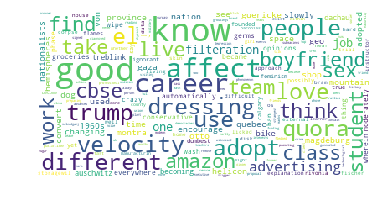

In [17]:
mpl.rcParams['font.size']=12                #10 
mpl.rcParams['savefig.dpi']=100             #72 
mpl.rcParams['figure.subplot.bottom']=.1 


stopwords = set(STOPWORDS)


wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(pos['question_text']))

print(wordcloud)
fig = plt.figure(0)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [17]:
from collections import defaultdict

In [23]:
def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(" ") if token != "" if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

In [24]:
freq_dict = defaultdict(int)
for sent in pos["question_text"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
posFreqOG = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
posFreqOG.columns = ["word", "wordcount"]

In [25]:
posFreqOG.head()

,word,wordcount
0,best way,7007
1,year old,3364
2,united states,3135
3,high school,2685
4,computer science,2631


In [26]:
freq_dict = defaultdict(int)
for sent in neg["question_text"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
negFreqOG = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
negFreqOG.columns = ["word", "wordcount"]

In [27]:
negFreqOG.shape

(443059, 2)

In [28]:
negFreqOG.head()

,word,wordcount
0,donald trump,1321
1,white people,864
2,black people,805
3,united states,573
4,president trump,405


In [29]:
topNegOG = negFreqOG.head(100)
topPosOG = posFreqOG.head(100)

In [30]:
cPosOG = set(topPosOG['word'])
cNegOG = set(topNegOG['word'])
commonOG = cPosOG.intersection(cNegOG)

In [31]:
len(commonOG)

18

In [32]:
commonOG

{'around world',
 'best way',
 'donald trump',
 'even though',
 'many people',
 'new york',
 'new zealand',
 'north korea',
 'people say',
 'people think',
 'president trump',
 'questions quora',
 'saudi arabia',
 'social media',
 'united states',
 'year old',
 'years ago',
 'years old'}

In [33]:
train['question_text'] = train['question_text'].map(lambda x: (' ').join([commonOG[w] if w in commonOG else w for w in x.split(" ")]))

***Let's see the change***

In [30]:
neg = train[train['target']==1]
pos = train[train['target']==0]

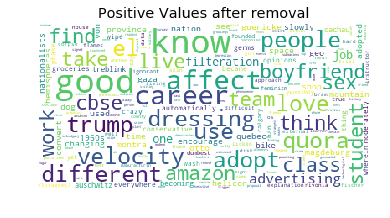

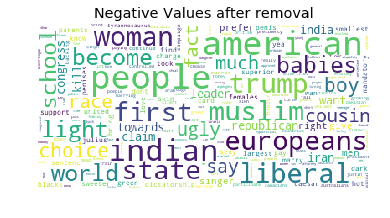

In [31]:
mpl.rcParams['font.size']=12                #10 
mpl.rcParams['savefig.dpi']=100             #72 
mpl.rcParams['figure.subplot.bottom']=.1 


stopwords = set(STOPWORDS)


wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(pos['question_text']))

print(wordcloud)
fig = plt.figure(0)
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Positive Values after removal')
plt.show()

mpl.rcParams['font.size']=12                #10 
mpl.rcParams['savefig.dpi']=100             #72 
mpl.rcParams['figure.subplot.bottom']=.1 


stopwords = set(STOPWORDS)


wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(neg['question_text']))

print(wordcloud)
fig = plt.figure(0)
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Negative Values after removal')
plt.show()

In [32]:
freq_dict = defaultdict(int)
for sent in neg["question_text"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
negFreq = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
negFreq.columns = ["word", "wordcount"]

negFreq.head()

,word,wordcount
0,donald trump,1321
1,white people,864
2,black people,805
3,united states,573
4,president trump,405


In [33]:
freq_dict = defaultdict(int)
for sent in pos["question_text"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
posFreq = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
posFreq.columns = ["word", "wordcount"]

posFreq.head()

,word,wordcount
0,best way,7007
1,year old,3364
2,united states,3135
3,high school,2685
4,computer science,2631


In [34]:
freq_dict = defaultdict(int)
for sent in pos["question_text"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
posFreqClean = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
posFreqClean.columns = ["word", "wordcount"]

In [35]:
freq_dict = defaultdict(int)
for sent in neg["question_text"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
negFreqClean = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
negFreqClean.columns = ["word", "wordcount"]

In [36]:
topNegClean = negFreqOG.head(100)
topPosClean = posFreqOG.head(100)

In [37]:
cPosClean= set(topPosClean['word'])
cNegClean = set(topNegClean['word'])
commonClean = cPosClean.intersection(cNegClean)

In [38]:
len(commonClean)

18

In [39]:
commonClean

{'around world',
 'best way',
 'donald trump',
 'even though',
 'many people',
 'new york',
 'new zealand',
 'north korea',
 'people say',
 'people think',
 'president trump',
 'questions quora',
 'saudi arabia',
 'social media',
 'united states',
 'year old',
 'years ago',
 'years old'}

***Start Plag***

In [108]:
from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

In [109]:
def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y=df["word"].values[::-1],
        x=df["wordcount"].values[::-1],
        showlegend=False,
        orientation = 'h',
        marker=dict(
            color=color,
        ),
    )
    return trace

In [110]:
freq_dict = defaultdict(int)
for sent in pos["question_text"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(50), 'orange')


freq_dict = defaultdict(int)
for sent in neg["question_text"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(50), 'orange')

# Creating two subplots
fig = tools.make_subplots(rows=1, cols=2, vertical_spacing=0.04,horizontal_spacing=0.15,
                          subplot_titles=["Frequent bigrams of sincere questions", 
                                          "Frequent bigrams of insincere questions"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Bigram Count Plots")
py.iplot(fig, filename='word-plots')

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



***end Plag***

In [40]:
pos.quesion_text = pos.question_text.str.replace('\d+', '')

/home/chetan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [41]:
pos.head()

,qid,question_text,target
0,00002165364db923c7e6,quebec nationalists see province nation 1960s,0
1,000032939017120e6e44,adopted dog would encourage people adopt shop,0
2,0000412ca6e4628ce2cf,velocity affect time velocity affect space geo...,0
3,000042bf85aa498cd78e,otto von guericke used magdeburg hemispheres,0
4,0000455dfa3e01eae3af,convert montra helicon mountain bike changing ...,0


***OG ML Stuff***

In [59]:
from sklearn.feature_extraction.text import CountVectorizer # It takes the words of each sentence and creates a vocabulary of all the unique words in the sentences. This vocabulary can then be used to create a feature vector of the count of the words

In [60]:
vals = train['question_text'].values
y = train['target'].values

In [61]:
train.groupby('target').size()

target
0    1225312
1      80810
dtype: int64

Soooo it's unbalanced

In [62]:
from sklearn.model_selection import train_test_split
vals_train, vals_test, y_train, y_test = train_test_split(vals, y,
                                                    stratify=y, 
                                                    test_size=0.25)

In [63]:
vectorizer = CountVectorizer()
vectorizer.fit(vals_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [64]:
X_train = vectorizer.transform(vals_train)
X_test  = vectorizer.transform(vals_test)
X_train

<979591x209120 sparse matrix of type '<class 'numpy.int64'>'
	with 6112265 stored elements in Compressed Sparse Row format>

!Classify Time!

In [86]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
score = classifier.score(X_test, y_test)

print("Accuracy:", score)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
score = classifier.score(X_test, y_test)

print("Accuracy(VAL):", score)


/home/chetan/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy: 0.9517319948182561
Accuracy(VAL): 0.9517136198400764


In [87]:
from sklearn.naive_bayes import MultinomialNB
classifier2 = MultinomialNB()
classifier2.fit(X_train, y_train)
score = classifier2.score(X_test, y_test)

print("Accuracy:", score)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)
classifier2 = MultinomialNB()
classifier2.fit(X_train, y_train)
score = classifier2.score(X_test, y_test)

print("Accuracy(val):", score)


Accuracy: 0.9434540671482953
Accuracy(val): 0.944513690889992


In [91]:
from sklearn.linear_model import ElasticNet
classifier3 = MultinomialNB()
classifier3.fit(X_train, y_train)
score = classifier3.score(X_test, y_test)

print("Accuracy:", score)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)
classifier3 = MultinomialNB()
classifier3.fit(X_train, y_train)
score = classifier3.score(X_test, y_test)

print("Accuracy(val):", score)


Accuracy: 0.944513690889992
Accuracy(val): 0.9450404402644772


In [97]:
from sklearn.ensemble import RandomForestClassifier
clf4 = RandomForestClassifier(n_estimators=500, max_depth=2)
clf4.fit(X_train, y_train)
score = clf4.score(X_test, y_test)
print("Accuracy:", score)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)
clf4 = RandomForestClassifier(n_estimators=500, max_depth=2)
clf4.fit(X_train, y_train)
score = clf4.score(X_test, y_test)

print("Accuracy(val):", score)


Accuracy: 0.9381283859725417
Accuracy(val): 0.9381283859725417


***HYPE TIME!?***

Term Frequency — Inverse Document Frequency (TF — IDF)

TF-IDF is a weighted model commonly used for information retrieval problems. It aims to convert the text documents into vector models on the basis of occurrence of words in the documents without taking considering the exact ordering. 

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
tfidf.fit(train['question_text'])

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [35]:
X = train['question_text']
y = train['target']

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y, 
                                                    test_size=0.25)

Chi-Squared for Feature Selection

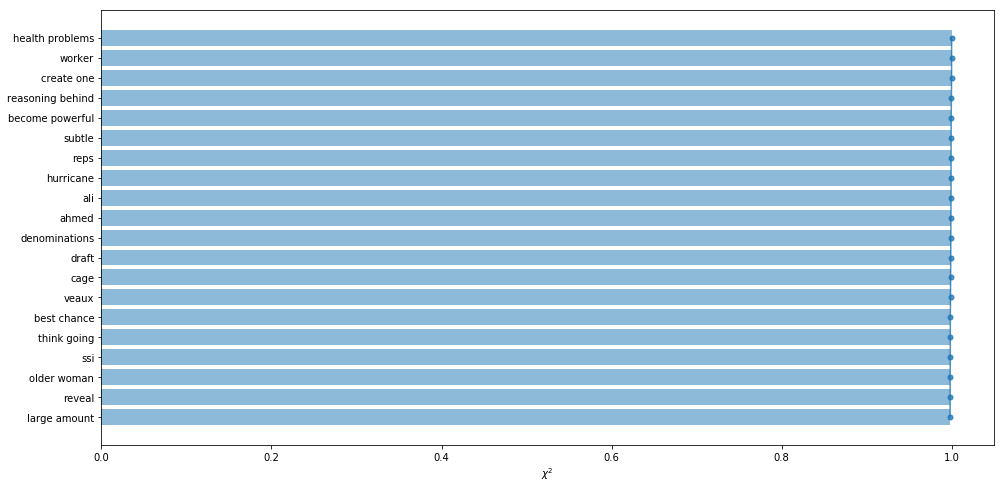

In [40]:
from sklearn.feature_selection import chi2

tfidf = TfidfVectorizer(max_features=30000,ngram_range=(1, 3))
X_tfidf = tfidf.fit_transform(train.question_text)
y = train['target']
chi2score = chi2(X_tfidf, y)[1]
plt.figure(figsize=(16,8))
scores = list(zip(tfidf.get_feature_names(), chi2score))
chi2 = sorted(scores, key=lambda x:x[1])
topchi2 = list(zip(*chi2[-20:]))
x = range(len(topchi2[1]))
labels = topchi2[0]
plt.barh(x,topchi2[1], align='center', alpha=0.5)
plt.plot(topchi2[1], x, '-o', markersize=5, alpha=0.8)
plt.yticks(x, labels)
plt.xlabel('$\chi^2$')
plt.show();

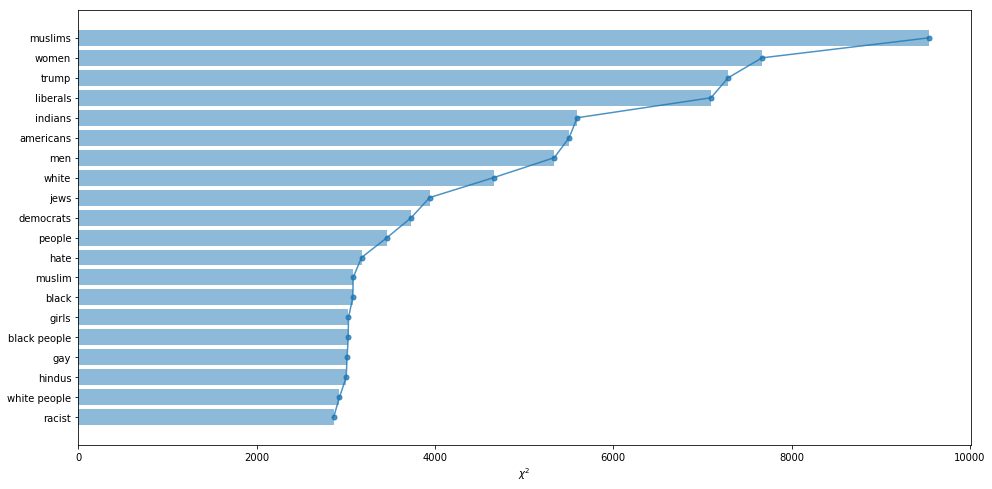

In [41]:
from sklearn.feature_selection import chi2

tfidf = TfidfVectorizer(max_features=30000,ngram_range=(1, 3))
X_tfidf = tfidf.fit_transform(train.question_text)
y = train['target']
chi2score = chi2(X_tfidf, y)[0]
plt.figure(figsize=(16,8))
scores = list(zip(tfidf.get_feature_names(), chi2score))
chi2 = sorted(scores, key=lambda x:x[1])
topchi2 = list(zip(*chi2[-20:]))
x = range(len(topchi2[1]))
labels = topchi2[0]
plt.barh(x,topchi2[1], align='center', alpha=0.5)
plt.plot(topchi2[1], x, '-o', markersize=5, alpha=0.8)
plt.yticks(x, labels)
plt.xlabel('$\chi^2$')
plt.show();

LSTM TIME

In [42]:
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
import re

Using TensorFlow backend.


Pad sequences

In order to feed this data into our RNN, all input documents must have the same length.

In [45]:
max_fatures = 30000
tokenizer = Tokenizer(nb_words=max_fatures, split=' ')
tokenizer.fit_on_texts(train['question_text'].values)
X1 = tokenizer.texts_to_sequences(train['question_text'].values)
X1 = pad_sequences(X1)
Y1 = pd.get_dummies(train['target']).values
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1,Y1, random_state = 42)
print(X1_train.shape,Y1_train.shape)
print(X1_test.shape,Y1_test.shape)

(979591, 62) (979591, 2)
(326531, 62) (326531, 2)


In [46]:
embed_dim = 150
lstm_out = 200

model = Sequential()
model.add(Embedding(max_fatures, embed_dim,input_length = X1.shape[1], dropout=0.2))
model.add(LSTM(lstm_out, dropout_U=0.2,dropout_W=0.2))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

/home/chetan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: The `dropout` argument is no longer support in `Embedding`. You can apply a `keras.layers.SpatialDropout1D` layer right after the `Embedding` layer to get the same behavior.
  """
/home/chetan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(200, dropout=0.2, recurrent_dropout=0.2)`
  


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 62, 150)           4500000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 200)               280800    
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 402       
Total params: 4,781,202
Trainable params: 4,781,202
Non-trainable params: 0
_________________________________________________________________
None


In [50]:
batch_size = 32
model.fit(X1_train, Y1_train, nb_epoch = 3, batch_size=batch_size, verbose = 2)

/home/chetan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Epoch 1/3
 - 8373s - loss: 0.1198 - acc: 0.9526
Epoch 2/3
 - 8102s - loss: 0.1077 - acc: 0.9577
Epoch 3/3
 - 7757s - loss: 0.1016 - acc: 0.9606


In [51]:
score,acc = model.evaluate(X1_test, Y1_test, verbose = 2, batch_size = batch_size)
print("score: %.2f" % (score))
print("acc: %.2f" % (acc))

score: 0.11
acc: 0.96


In [53]:
import numpy as np

In [54]:
pos_cnt, neg_cnt, pos_correct, neg_correct = 0, 0, 0, 0
for x in range(len(X1_test)):
    
    result = model.predict(X1_test[x].reshape(1,X1_test.shape[1]),batch_size=1,verbose = 2)[0]
   
    if np.argmax(result) == np.argmax(Y1_test[x]):
        if np.argmax(Y1_test[x]) == 0:
            neg_correct += 1
        else:
            pos_correct += 1
       
    if np.argmax(Y1_test[x]) == 0:
        neg_cnt += 1
    else:
        pos_cnt += 1



print("pos_acc", pos_correct/pos_cnt*100, "%")
print("neg_acc", neg_correct/neg_cnt*100, "%")

pos_acc 58.18245649230151 %
neg_acc 97.9304743763699 %


Prediction Time

In [70]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [2]:
from keras.models import model_from_json

Using TensorFlow backend.


In [3]:
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


In [73]:
from keras.preprocessing import text, sequence

In [78]:
maxlen = 62
max_features = 50000
X_test = test["question_text"].fillna("dieter").values
X_test = tokenizer.texts_to_sequences(X_test)
x_test = sequence.pad_sequences(X_test, maxlen=maxlen)

In [79]:
y_pred = loaded_model.predict(x_test, batch_size=1024)

In [80]:
y_pred.shape

(56370, 2)

In [82]:
y_te = (y_pred[:,0] > 0.5).astype(np.int)

In [85]:
submit_df = pd.DataFrame({"qid": test["qid"], "prediction": y_te})
submit_df.to_csv("sample_submission.csv", index=False)